<a href="https://colab.research.google.com/github/Kimjihee05/mining/blob/main/%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EA%B9%80%EC%A7%80%ED%9D%AC2015352.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

건강검진 데이터를 활용한 세가지 시각화 차트 만들어 인사이트를 도출할 예정이다.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns  

In [2]:
#https://seaborn.pydata.org/tutorial/aesthetics.html

sns.set_style("whitegrid") # choose a style for seaborn figure

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd

# .csv 데이터 가져오기
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/health_data.csv")
display(health.head()) 
print(health.info())  



,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_te

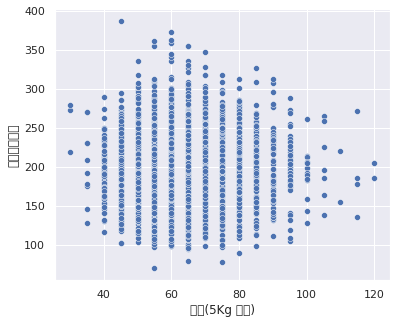

In [24]:
# x축은 체중, y축은 총콜레스트롤을 나타낸 산점도 만들기
sns.scatterplot(data =health, x = '체중(5Kg 단위)', y = '총콜레스테롤')

첫번째, 산점도 그래프에서는 건강검진을 받을 사람들이 체중과 총콜레스테롤 수치의 상관관계를 살펴보았다. 그래프 분석 전 나는 체중과 총 콜레스테롤 수치이 비례할 것이라는 가정을 세웠다. 분석한 그래프를 보면,50kg 후반대~ 70kg 후반대까지의 콜레스테롤 수치가 가장 높은 것을 확인할 수 있다. 이는 80kg~100kg대의 사람들의 수치와 비교해봤을때보다 높은 수치로 체중과 콜레스테롤의 어느정도 상관관계가 있는 것은 맞으나, 항상 비례하는 것은 아님을 알 수있다. 

막대 그래프
데이터의 크기를 막대의 길이로 표현
집단 간 차이 표현

In [25]:
#집단별 평균표 만들기
df_mpg = health.groupby('음주여부' , as_index = False).agg( meangamma = ('감마지티피', 'mean'))
df_mpg

,음주여부,meangamma
0,No,27.305576
1,Yes,45.740351


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_te

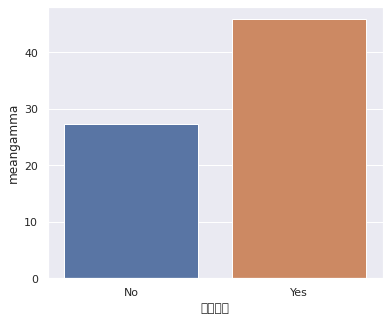

In [26]:
sns.barplot(data = df_mpg, x = '음주여부', y = 'meangamma')

다음으로 막대그래프에서는, 사람들의 음주여부와 간수치의 상관관계를 그래프로써 분석해보았다. 간에 장애가 생겼을 시 수치가 올라가는 감마지티피와의 분석을 해보았다. 평소 음주의 요소가 간에 안좋은 영향을 미치는 것으로 알고있기 때문에 두 그룹간의 차이가 날 것이라는 가정을 내렸다. 음주를 하는 사람과 안하는 사람의 그룹으로 나누어 보았을때, 음주를 하지 않은 그룹의 감마지티피는 약 28정도이고, 음주 여부가 있는 사람들의 그룹은 약 48, 두배에 가까운 수치인 것을 확인할 수 있다. 즉 음주는 간의 여러 문제, 장애에 악영향을 미친다는 사실이 확인된 것이다. 

선 그래프를 이용해 체중과 수축기혈압간의 상관관계 파악하기 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_te

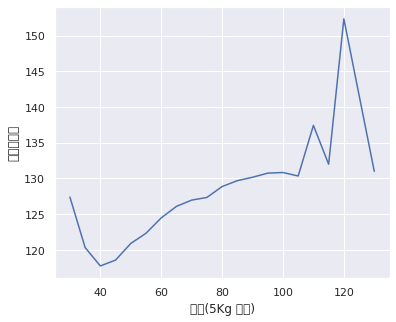

In [23]:
# 그래프 사이즈 지정
sns.set(rc={'figure.figsize':(6, 5)}) 

# x축에 연도 표시
sns.lineplot(data =health, x = '체중(5Kg 단위)', y = '수축기혈압', ci=None)

:

마지막으로 선그래프 분석을 위해 용이한 시계열 분석을 시도해보려 하였으나, 시간과 상관관계가 큰 데이터가 없어 체중과 검진자의 최고혈압의 관계를 분석해보았다. 평소 알고있던 지식으로는 비만은 혈압과 아주 밀접한 관계가 있습니다. 최근 젊은 사람에서 다른 원인이나 가족력 없이도 고혈압이 발생하는 경우가 늘어나고 있는데, 비만과 관련된 경우가 많기도 하다. 따라서 선그래프 분석을 통해 체중이 늘어날 수록 최고혈압이 높아지는지 확인해보았다. 그래프에서 보이다시피, 체중이 늘어날 수록 최고혈압의 수치는 점점 높아지며 100kg 이상등의 비만에 도달할시 최고혈압이 130에서 150으로 대폭 상승한 것으로 보인다. 이는 비만과 높은 혈압간의 밀접한 상관관계를 보여주는 것이다. 

정리하자면, 위와 같은 데이더 시각화 분석을 통해 세가지 인사이트를 도출하였다. 첫째, 체중과 콜레스테롤의 어느정도 상관관계가 있는 것은 맞으나, 항상 비례하는 것은 아니다. 두번째, 음주는 간의 여러 문제, 장애에 악영향을 미친다. 세번째, 비만과 높은 혈압은 밀접한 상관관계를 가지고 있다. 